In [1]:
import os
import copy
import opendssdirect as dss 
import networkx as nx
import numpy as np
import math
import pandas as pd
from geopy.distance import geodesic
# from DSS_CircuitSetup import *
import osmnx as ox
import pickle
import matplotlib.pyplot as plt
from IPython.display import Image
from gurobipy import Model, GRB, quicksum

import time

In [2]:
with open('TrasportNetGraph.gpickle', 'rb') as f:          # to load graph
    G = pickle.load(f) 

df_GPrim_coord = pd.read_excel("GPrim_coord.xlsx")

# Experiement 2

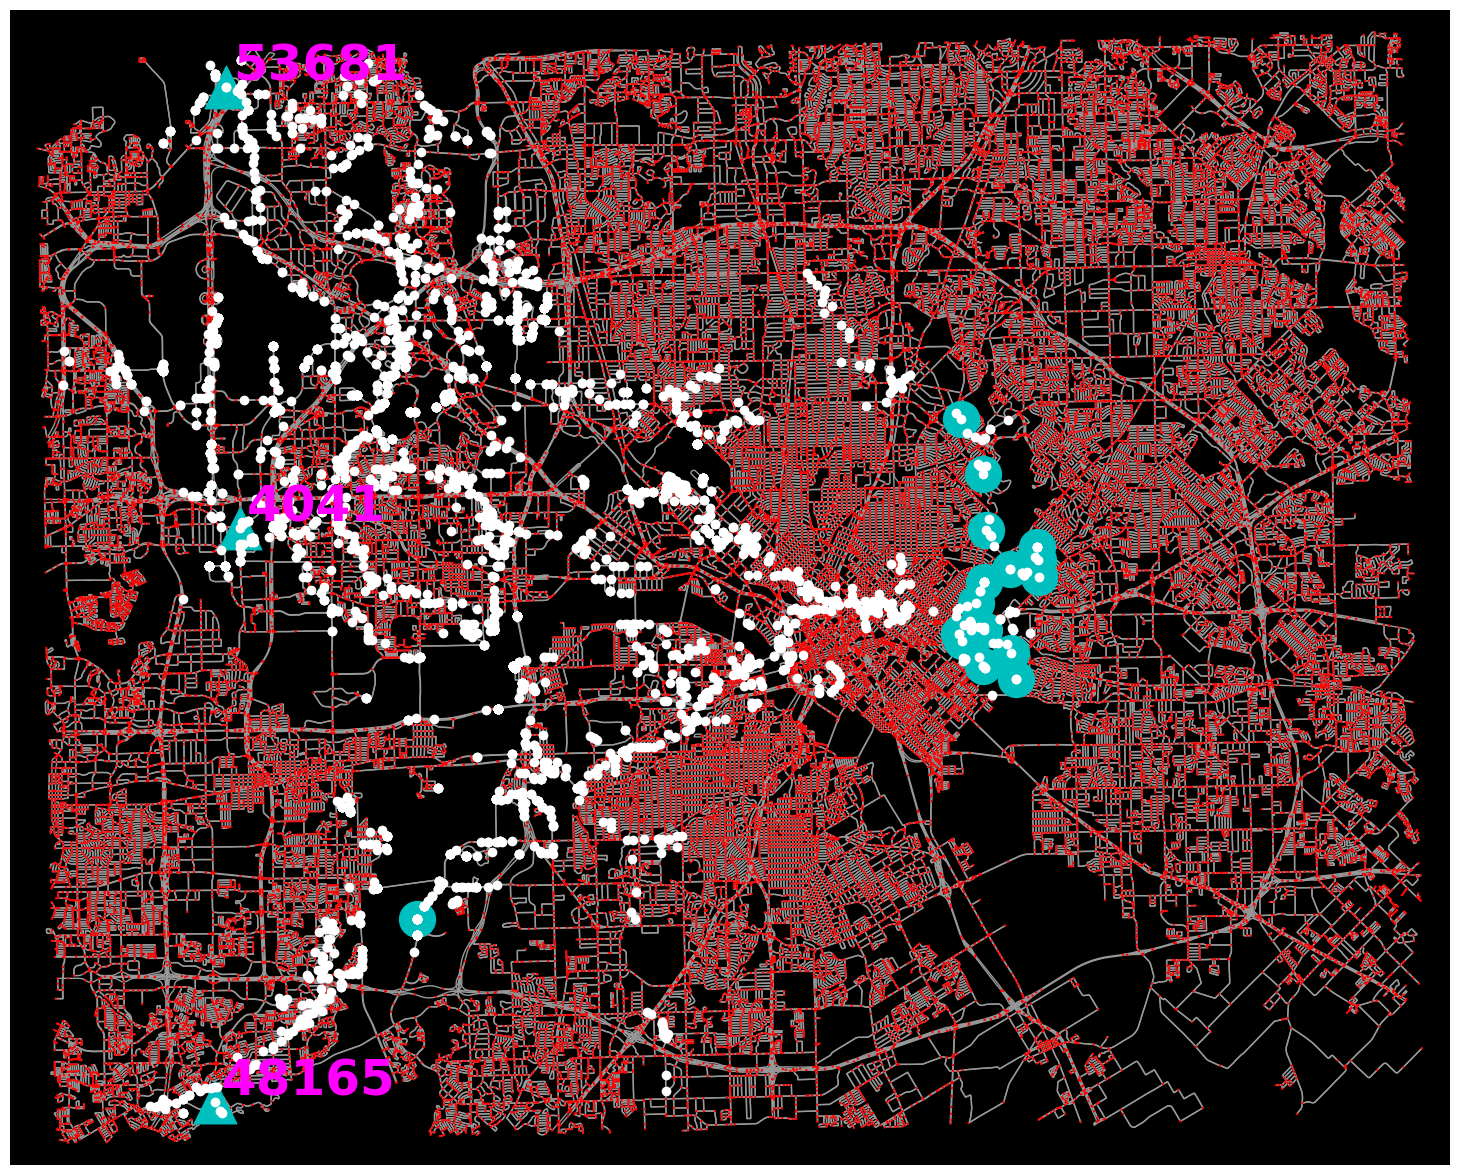

In [3]:
fig, ax = plt.subplots(figsize = (21, 15))
ax.set_facecolor('black')  # Set background color to black
ox.plot_graph(G, node_color = "r", node_size = 3, show = False, close = False, ax = ax)

depot1 = 53681
depot2 = 4041
depot3 = 48165

fail1 = 37215
fail2 = 23214
fail3 = 8433
fail4 = 36856

fail5 = 51201
fail6 = 31506 
fail7 = 31505 
fail8 = 34563 

fail9 = 44006 
fail10 = 37223 
fail11 = 14510 
fail12 = 1646  

fail13 = 13459  
fail14 = 42738  
fail15 = 31529 
fail16 = 15069  

fail17 = 38556 

ax.scatter(G.nodes[depot1]['x'], G.nodes[depot1]['y'], c='c', marker='^', s = 939)
ax.text(G.nodes[depot1]['x'] + 252, G.nodes[depot1]['y'] + 252, f'{depot1}', fontsize = 36, color = 'magenta', weight='bold')

ax.scatter(G.nodes[depot2]['x'], G.nodes[depot2]['y'], c='c', marker='^', s = 939)
ax.text(G.nodes[depot2]['x'] + 252, G.nodes[depot2]['y'] + 252, f'{depot2}', fontsize = 36, color = 'magenta', weight='bold')

ax.scatter(G.nodes[depot3]['x'], G.nodes[depot3]['y'], c='c', marker='^', s = 939)
ax.text(G.nodes[depot3]['x'] + 252, G.nodes[depot3]['y'] + 252, f'{depot3}', fontsize = 36, color = 'magenta', weight='bold')

ax.scatter(G.nodes[fail1]['x'], G.nodes[fail1]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail2]['x'], G.nodes[fail2]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail3]['x'], G.nodes[fail3]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail4]['x'], G.nodes[fail4]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail5]['x'], G.nodes[fail5]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail6]['x'], G.nodes[fail6]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail7]['x'], G.nodes[fail7]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail8]['x'], G.nodes[fail8]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail9]['x'], G.nodes[fail9]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail10]['x'], G.nodes[fail10]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail11]['x'], G.nodes[fail11]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail12]['x'], G.nodes[fail12]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail13]['x'], G.nodes[fail13]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail14]['x'], G.nodes[fail14]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail15]['x'], G.nodes[fail15]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail16]['x'], G.nodes[fail16]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail17]['x'], G.nodes[fail17]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

# ax.scatter(G.nodes[fail18]['x'], G.nodes[fail18]['y'], c='c', marker='o', s = 669)
# # ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

# ax.scatter(G.nodes[fail19]['x'], G.nodes[fail19]['y'], c='c', marker='o', s = 669)
# # ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

# ax.scatter(G.nodes[fail20]['x'], G.nodes[fail20]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')


for i in df_GPrim_coord['closest_node_osmid']:
    ax.scatter(G.nodes[i]['x'], G.nodes[i]['y'], c='white', marker='o', s = 36)
    
# fig.savefig('DFW_8500_selected_nodes2.png', bbox_inches = 'tight')

In [4]:
shortest_path_lengths = {}
shortest_path_routes = {}
routes = []
nodes_list = [depot1, depot2, depot3, fail1, fail2, fail3, fail4, fail5, fail6, fail7, 
              fail8, fail9, fail10, fail11, fail12, fail13, fail14, fail15, fail16, fail17]

for i in nodes_list:
    for j in nodes_list: 
        if i != j:
            route = ox.shortest_path(G, i, j, weight = "length")
            shortest_path_length = sum(ox.utils_graph.get_route_edge_attributes(G, route, "length"))
            shortest_path_lengths[(i, j)] = shortest_path_length 
            shortest_path_routes[(i, j)] = route
            routes.append(route)

C:\Users\HXK230065\AppData\Local\Temp\ipykernel_11944\650303380.py:11: FutureWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in the v2.0.0 release. Use the `route_to_gdf` function instead.
  shortest_path_length = sum(ox.utils_graph.get_route_edge_attributes(G, route, "length"))


In [ ]:
fig, ax = ox.plot_graph(G, node_color = "red", node_size = 3, show = False,\
                        close = False, figsize = (21, 15), bgcolor='black')

# Plot the graph routes with specified parameters
# ox.plot_graph_routes(G, routes, route_colors = "magenta", route_linewidth = 10, \
#                      node_color = "r", node_size = 6, ax = ax, show = False, close = False)

for offset in np.linspace(-1, 1, 3):
    ox.plot_graph_routes(G, routes, route_colors="yellow", route_linewidth=10, \
                         node_color="r", node_size=6, ax=ax, show=False, close=False, offset=offset)


ax.scatter(G.nodes[depot1]['x'], G.nodes[depot1]['y'], c='c', marker='^', s = 939)
ax.text(G.nodes[depot1]['x'] + 252, G.nodes[depot1]['y'] + 252, f'{depot1}', fontsize = 36, color = 'magenta', weight='bold')

ax.scatter(G.nodes[depot2]['x'], G.nodes[depot2]['y'], c='c', marker='^', s = 939)
ax.text(G.nodes[depot2]['x'] + 252, G.nodes[depot2]['y'] + 252, f'{depot2}', fontsize = 36, color = 'magenta', weight='bold')

ax.scatter(G.nodes[depot3]['x'], G.nodes[depot3]['y'], c='c', marker='^', s = 939)
ax.text(G.nodes[depot3]['x'] + 252, G.nodes[depot3]['y'] + 252, f'{depot3}', fontsize = 36, color = 'magenta', weight='bold')

ax.scatter(G.nodes[fail1]['x'], G.nodes[fail1]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail2]['x'], G.nodes[fail2]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail3]['x'], G.nodes[fail3]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail4]['x'], G.nodes[fail4]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail5]['x'], G.nodes[fail5]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail6]['x'], G.nodes[fail6]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail7]['x'], G.nodes[fail7]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail8]['x'], G.nodes[fail8]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail9]['x'], G.nodes[fail9]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail10]['x'], G.nodes[fail10]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail11]['x'], G.nodes[fail11]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail12]['x'], G.nodes[fail12]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail13]['x'], G.nodes[fail13]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail14]['x'], G.nodes[fail14]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail15]['x'], G.nodes[fail15]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail16]['x'], G.nodes[fail16]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

ax.scatter(G.nodes[fail17]['x'], G.nodes[fail17]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

# ax.scatter(G.nodes[fail18]['x'], G.nodes[fail18]['y'], c='c', marker='o', s = 669)
# # ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

# ax.scatter(G.nodes[fail19]['x'], G.nodes[fail19]['y'], c='c', marker='o', s = 669)
# # ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

# ax.scatter(G.nodes[fail20]['x'], G.nodes[fail20]['y'], c='c', marker='o', s = 669)
# ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')
# for i in df_GPrim_coord['closest_node_osmid']:
#     ax.scatter(G.nodes[i]['x'], G.nodes[i]['y'], c='blue', marker='o', s = 18)

# fig.savefig('DFW_8500_selected_nodes_ShortestPaths2.png', bbox_inches = 'tight')

# plt.show()


In [ ]:
G_complete = nx.Graph()
for (node1, node2), weight in shortest_path_lengths.items():
    G_complete.add_edge(node1, node2, weight = weight)
    
# pos = nx.kamada_kawai_layout(G_complete, scale = 10)
# nx.draw(G_complete, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=21, font_color='black')


pos = nx.kamada_kawai_layout(G_complete, scale=3)

pos_labels = {node: (x, y -0.09) for node, (x, y) in pos.items()}

nx.draw(G_complete, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=21, font_color='black')
# nx.draw_networkx_labels(G_complete, pos_labels, font_size = 21,font_color='black')



# plt.savefig('DFW_8500_completeG2.png')

In [ ]:
def routes_plot_func(nodes_list, shortest_path_routes, active_arcs, itr):
    
    routes_CVRP = []
    for arc in active_arcs:
        routes_CVRP.append(shortest_path_routes[arc])

    fig, ax = ox.plot_graph(G, node_color = "red", node_size = 3, show = False,\
                            close = False, figsize = (21, 15), bgcolor='black')

    depot1 = nodes_list[0]
    depot2 = nodes_list[1]
    depot3 = nodes_list[2]
    fail1 = nodes_list[3]
    fail2 = nodes_list[4]
    fail3 = nodes_list[5]
    fail4 = nodes_list[6]
    fail5 = nodes_list[7]
    fail6 = nodes_list[8]
    fail7 = nodes_list[9]
    fail8 = nodes_list[10]
    fail9 = nodes_list[11]
    fail10 = nodes_list[12]
    fail11 = nodes_list[13]
    fail12 = nodes_list[14]
    fail13 = nodes_list[15]
    fail14 = nodes_list[16]
    fail15 = nodes_list[17]
    fail16 = nodes_list[18]
    fail17 = nodes_list[19]
#     fail18 = nodes_list[20]
#     fail19 = nodes_list[21]
#     fail20 = nodes_list[22]
    
#     dest = nodes_list[8]

    for offset in np.linspace(-1, 1, 3):
        ox.plot_graph_routes(G, routes_CVRP, route_colors="yellow", route_linewidth=10, \
                             node_color="r", node_size=3, ax=ax, show=False, close=False, offset=offset)

    ax.scatter(G.nodes[depot1]['x'], G.nodes[depot1]['y'], c='c', marker='^', s = 939)
    ax.text(G.nodes[depot1]['x'] + 252, G.nodes[depot1]['y'] + 252, f'{depot1}', fontsize = 36, color = 'magenta', weight='bold')

    ax.scatter(G.nodes[depot2]['x'], G.nodes[depot2]['y'], c='c', marker='^', s = 939)
    ax.text(G.nodes[depot2]['x'] + 252, G.nodes[depot2]['y'] + 252, f'{depot2}', fontsize = 36, color = 'magenta', weight='bold')

    ax.scatter(G.nodes[depot3]['x'], G.nodes[depot3]['y'], c='c', marker='^', s = 939)
    ax.text(G.nodes[depot3]['x'] + 252, G.nodes[depot3]['y'] + 252, f'{depot3}', fontsize = 36, color = 'magenta', weight='bold')

    ax.scatter(G.nodes[fail1]['x'], G.nodes[fail1]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail2]['x'], G.nodes[fail2]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail3]['x'], G.nodes[fail3]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail4]['x'], G.nodes[fail4]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail5]['x'], G.nodes[fail5]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail6]['x'], G.nodes[fail6]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail7]['x'], G.nodes[fail7]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail8]['x'], G.nodes[fail8]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail9]['x'], G.nodes[fail9]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail10]['x'], G.nodes[fail10]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail11]['x'], G.nodes[fail11]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail12]['x'], G.nodes[fail12]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail13]['x'], G.nodes[fail13]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail14]['x'], G.nodes[fail14]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail15]['x'], G.nodes[fail15]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail16]['x'], G.nodes[fail16]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail1]['x'] + 252, G.nodes[fail1]['y'] + 252, f'{fail1}', fontsize = 36, color = 'yellow', weight='bold')

    ax.scatter(G.nodes[fail17]['x'], G.nodes[fail17]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail2]['x'] + 252, G.nodes[fail2]['y'] + 252, f'{fail2}', fontsize = 36, color = 'yellow', weight='bold')

#     ax.scatter(G.nodes[fail18]['x'], G.nodes[fail18]['y'], c='c', marker='o', s = 669)
#     # ax.text(G.nodes[fail3]['x'] + 252, G.nodes[fail3]['y'] + 252, f'{fail3}', fontsize = 36, color = 'yellow', weight='bold')

#     ax.scatter(G.nodes[fail19]['x'], G.nodes[fail19]['y'], c='c', marker='o', s = 669)
#     # ax.text(G.nodes[fail4]['x'] + 252, G.nodes[fail4]['y'] + 252, f'{fail4}', fontsize = 36, color = 'yellow', weight='bold')

#     ax.scatter(G.nodes[fail20]['x'], G.nodes[fail20]['y'], c='c', marker='o', s = 669)
    # ax.text(G.nodes[fail5]['x'] + 252, G.nodes[fail5]['y'] + 252, f'{fail5}', fontsize = 36, color = 'yellow', weight='bold')
    # for i in df_GPrim_coord['closest_node_osmid']:
    #     ax.scatter(G.nodes[i]['x'], G.nodes[i]['y'], c='blue', marker='o', s = 18)
       
    plt.show()
    
#     plt.savefig(f"Final_paths_iter_{itr}.pdf", bbox_inches = 'tight')
#     plt.savefig('Final_paths_iter__.pdf', bbox_inches = 'tight')

In [ ]:
failed_node_dict = {fail1: 'm1209822', fail2: 'l2936216', fail3: 'l2823611', fail4: 'l3139366',
                    fail5: 'l2785527', fail6: 'm1209817', fail7: 'm1209814', fail8: 'm1209811',
                    fail9: 'm1209797', fail10: 'm1209807', fail11: 'm1209748', fail12:  'm1209795',
                    fail13: 'm1186061', fail14:  'm1209753', fail15: 'm1209763', fail16: 'm1186078',
                    fail17: 'm1209750'}

In [ ]:
# Define mu and sigma
def Repair_time_Power_restored():
    mu, sigma = -0.3072, 1.8404
    Repair_time_dict_old = {}
    for node in [37215, 23214,  8433, 36856, 
                 51201, 31506, 31505, 34563, 
                 44006, 37223, 14510, 1646, 
                 13459, 42738, 31529, 15069, 
                 38556]:
        sample_t = np.random.lognormal(mu, sigma)

        # Truncate unreasonable values like 0.01
        while sample_t < 1:
            sample_t = np.random.lognormal(mu, sigma)

        # Add to dictionary
        Repair_time_dict_old[node] = sample_t

    %run "powerRestored\PowerNetwork_Graph_Final-Expt2.ipynb"

    return Repair_time_dict_old, Power_restored_dict_old

In [ ]:
[Repair_time_dict_old, Power_restored_dict_old] = Repair_time_Power_restored()

In [ ]:
Power_restored_dict = {}

for key, value in failed_node_dict.items():
    Power_restored_dict[key] = Power_restored_dict_old[value]

In [ ]:
Repair_time_dict = {}
for key, value in Repair_time_dict_old.items():
    Repair_time_dict[key] = (1000 - value)/100

In [ ]:
rnd = np.random
rnd.seed(0)

n = len(nodes_list) - 2                         # total node points (includes the depots)

N = [fail1, fail2, fail3, fail4, 
     fail5, fail6, fail7, fail8,
     fail9, fail10, fail11, fail12,
     fail13, fail14, fail15, fail16,
     fail17]         # all the failed nodes (excluding the start and end depot)

V = [depot1, depot2, depot3] + N                # total failed nodes and depots

A = [(i, j) for i in V for j in V if i != j]    # edge-list construction
A.remove((depot1, depot2))
A.remove((depot1, depot3))
A.remove((depot2, depot1))
A.remove((depot2, depot3))
A.remove((depot3, depot1))
A.remove((depot3, depot2))

# B = []
# for i, j in A:
#     if i != dest and j != orig:
#         B.append((i, j))

B = A
        
c = {(i, j): shortest_path_lengths[(i, j)] 
     for i, j in B}                             # cost matrix

Q = 54                                          # capacity of a vehicle

q = {i: rnd.randint(1, 10) for i in N}          # random demand at a node

In [ ]:
def Resource_allocation(N, q_rem, Q, Repair_time_dict_RA, Power_restored_dict_RA):
    
    mdl1 = Model('Resource_Allocation')

    x_q = mdl1.addVars(N, vtype = GRB.CONTINUOUS)        # Continuous decision variable to allocate resources of crew
    # y = mdl1.addVars(N, vtype = GRB.BINARY)            # Binary decision variable to allocate resources of crew 

    mdl1.modelSense = GRB.MAXIMIZE
    # mdl.setObjective(quicksum(Repair_time_dict[i]  * (x[i] + y[i]) for i in N) 
    #                  + quicksum(Power_restored_dict[i]  * (x[i] + y[i]) for i in N))

    mdl1.setObjective(quicksum(Repair_time_dict_RA[i] * x_q[i]  for i in N) 
                      + quicksum(Power_restored_dict_RA[i] * x_q[i] for i in N))
    #                   - 10000 * quicksum(q[i] - x_q[i] for i in N))

    #     for i in N:
    mdl1.addConstr(quicksum(x_q[i] for i in N) <= Q)  # constraint: 

    mdl1.addConstrs(x_q[i] <= q_rem[i] for i in N)
    mdl1.addConstrs(x_q[i] >= 0 for i in N)

    mdl1.Params.LogToConsole = 0
    mdl1.Params.MIPGap = 0.1
    mdl1.Params.TimeLimit = 30  # seconds.
    mdl1.optimize()

    q_temp = {}
    
    for i in N:
        q_temp[i] = x_q[i].x
    
    return q_temp

In [ ]:
def CVRP(B, N, V, q_temp, q, Q, Repair_time_dict, Power_restored_dict):
    
    mdl = Model('CVRP')

    x = mdl.addVars(B, vtype = GRB.BINARY)                                # Binary decision variable set 1 (represents how the tour is formed)
    u = mdl.addVars(V, vtype = GRB.CONTINUOUS)                            # Continuous decision variable set 2 (represents demand satisfaction)
    t = mdl.addVars(V, vtype = GRB.CONTINUOUS)                            # Continuous decision variable set 3 (useful in the subtour elimination)
    
    q_temp[V[0]] = 0
    q_temp[V[1]] = 0
    q_temp[V[2]] = 0

    print()
    print()
    for i in N:
        print("Repair demand at      ", i, ": ", q[i])
        print("Repair_t (sec) at     ", i, ": ", 1000 - Repair_time_dict[i] * 100)
        print("Power_restored (W) at ", i, ": ", Power_restored_dict[i])
        print()

    mdl.modelSense = GRB.MINIMIZE
    mdl.setObjective(quicksum(x[i, j] * c[i, j] for i, j in B) + quicksum(t[i] * Repair_time_dict[i]  for i in N)
                     + quicksum(t[i] * Power_restored_dict[i]  for i in  N))  # objective function.    
   
    for i in N:
        if q_temp[i] > 0:
            mdl.addConstr(quicksum(x[i, j] for j in V if (i, j) in B) == 1)  # constraint: Every damaged node is exited once. As long as they have nonzero demand.

    for j in N:
        if q_temp[j] > 0:
            mdl.addConstr(quicksum(x[i, j] for i in V if (i, j) in B) == 1)  # constraint: Every damaged node is visited once. As long as they have nonzero demand.
  
    for i, j in B:  
        mdl.addConstr((x[i, j] == 1) >> (u[i] + q_temp[j] == u[j]))           # constraint: Satisfy capacity demand q[j] of node j.

    for j in N:
        mdl.addConstr(quicksum(x[i, j] for i in V if (i, j) in B) == \
                      quicksum(x[j, i] for i in V if (j, i) in B))       # constraint: Flow balance.

    for i, j in B:  
        mdl.addConstr((x[i, j] == 1) >> (t[i] + 1  == t[j]))             # constraint: Subtour elimination.
        
    for i, j in B:  
        mdl.addConstr((x[i, j] == 1) >> (t[j] >= t[i] + 0.1))            # constraint: Subtour elimination.
        
    mdl.addConstrs(u[i] <= Q for i in N)
    mdl.addConstrs(u[i] >= 0 for i in N)
        
    mdl.Params.LogToConsole = 0
    mdl.Params.MIPGap = 0.1
    mdl.Params.TimeLimit = 30  # seconds.
    mdl.optimize()
    
#     mdl.write("solution_file_CVRP.sol")
        
    active_arcs = [b for b in B if x[b].x > 0.99]  # obtain the active arc chosen.

    return active_arcs

In [ ]:
Repair_time_dict_RA = {key: Repair_time_dict[key] / q[key] for key in Repair_time_dict}
Power_restored_dict_RA = {key: Power_restored_dict[key] / q[key] for key in Power_restored_dict}

In [ ]:
start = time.time()

q_rem = q.copy()

itr = 0

while any(value > 0 for value in q_rem.values()):

    itr += 1
    
    q_temp = Resource_allocation(N, q_rem, Q, Repair_time_dict_RA, Power_restored_dict_RA)
    active_arcs = CVRP(B, N, V, q_temp, q, Q, Repair_time_dict, Power_restored_dict)
    
    print("q_rem:  ", q_rem)
    print("q_temp: ", q_temp)
    
    for key, value in q_rem.items():
        q_rem[key] = q_rem[key] - q_temp[key]
    
    print()
    
    routes_plot_func(nodes_list, shortest_path_routes, active_arcs, itr)

end = time.time()
print()
print("Total time spent in optimization: ", end - start)